In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
cd Downloads   #Setting the path

[WinError 2] The system cannot find the file specified: 'Downloads #Setting the path'
C:\Users\hp\Desktop\Python


In [3]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')   #Read the CSV

In [4]:
#EDA

df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
#Converting null values into 0
df.iloc[:,:22] = df.iloc[:,:22].replace(np.nan,0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [34]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.02), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95),x.quantile(0.98), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' ,'P2', 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P98','P99' ,'MAX'])



In [36]:
df.apply(lambda x: var_summary(x)).T

N  NMISS       SUM      MEAN  MEDIAN  \
h1n1_worry                 26707.0    0.0   43076.0  1.612910     2.0   
h1n1_awareness             26707.0    0.0   33572.0  1.257049     1.0   
antiviral_medication       26707.0    0.0    1301.0  0.048714     0.0   
contact_avoidance          26707.0    0.0   19228.0  0.719961     1.0   
bought_face_mask           26707.0    0.0    1841.0  0.068933     0.0   
wash_hands_frequently      26707.0    0.0   22015.0  0.824316     1.0   
avoid_large_gatherings     26707.0    0.0    9547.0  0.357472     0.0   
reduced_outside_home_cont  26707.0    0.0    8981.0  0.336279     0.0   
avoid_touch_face           26707.0    0.0   18001.0  0.674018     1.0   
dr_recc_h1n1_vacc          26707.0    0.0    5408.0  0.202494     0.0   
dr_recc_seasonal_vacc      26707.0    0.0    8094.0  0.303067     0.0   
chronic_medic_condition    26707.0    0.0    7290.0  0.272962     0.0   
cont_child_undr_6_mnths    26707.0    0.0    2138.0  0.080054     0.0   
is_health_worker           26707.0    0.0    2899.0  0.108548     0.0   
has_health_insur           26707.0    0.0   12697.0  0.475418     0.0   
is_h1n1_vacc_effective     26707.0    0.0  101333.0  3.794249     4.0   
is_h1n1_risky              26707.0    0.0   61654.0  2.308533     2.0   
sick_from_h1n1_vacc        26707.0    0.0   62035.0  2.322799     2.0   
is_seas_vacc_effective     26707.0    0.0  105662.0  3.956341     4.0   
is_seas_risky              26707.0    0.0   71223.0  2.666829     2.0   
sick_from_seas_vacc        26707.0    0.0   55431.0  2.075523     2.0   
age_bracket                26707.0    0.0   58385.0  2.186131     2.0   
qualification              26707.0    0.0   68986.0  2.583068     3.0   
race                       26707.0    0.0   68645.0  2.570300     3.0   
sex                        26707.0    0.0   10849.0  0.406223     0.0   
income_level               26707.0    0.0   34488.0  1.291347     1.0   
marital_status             26707.0    0.0   37043.0  1.387015     1.0   
housing_status             26707.0    0.0   30594.0  1.145542     1.0   
employment                 26707.0    0.0   38381.0  1.437114     1.0   
census_msa                 26707.0    0.0   22260.0  0.833489     1.0   
no_of_adults               26707.0    0.0   23455.0  0.878234     1.0   
no_of_children             26707.0    0.0   14144.0  0.529599     0.0   
h1n1_vaccine               26707.0    0.0    5674.0  0.212454     0.0   

                                STD       VAR  MIN   P1   P2   P5  P10  P25  \
h1n1_worry                 0.913676  0.834804  0.0  0.0  0.0  0.0  0.0  1.0   
h1n1_awareness             0.622368  0.387342  0.0  0.0  0.0  0.0  1.0  1.0   
antiviral_medication       0.215273  0.046343  0.0  0.0  0.0  0.0  0.0  0.0   
contact_avoidance          0.449026  0.201625  0.0  0.0  0.0  0.0  0.0  0.0   
bought_face_mask           0.253345  0.064184  0.0  0.0  0.0  0.0  0.0  0.0   
wash_hands_frequently      0.380558  0.144825  0.0  0.0  0.0  0.0  0.0  1.0   
avoid_large_gatherings     0.479264  0.229694  0.0  0.0  0.0  0.0  0.0  0.0   
reduced_outside_home_cont  0.472444  0.223204  0.0  0.0  0.0  0.0  0.0  0.0   
avoid_touch_face           0.468749  0.219726  0.0  0.0  0.0  0.0  0.0  0.0   
dr_recc_h1n1_vacc          0.401866  0.161496  0.0  0.0  0.0  0.0  0.0  0.0   
dr_recc_seasonal_vacc      0.459592  0.211225  0.0  0.0  0.0  0.0  0.0  0.0   
chronic_medic_condition    0.445490  0.198461  0.0  0.0  0.0  0.0  0.0  0.0   
cont_child_undr_6_mnths    0.271382  0.073648  0.0  0.0  0.0  0.0  0.0  0.0   
is_health_worker           0.311077  0.096769  0.0  0.0  0.0  0.0  0.0  0.0   
has_health_insur           0.499405  0.249405  0.0  0.0  0.0  0.0  0.0  0.0   
is_h1n1_vacc_effective     1.101805  1.213974  0.0  0.0  1.0  2.0  2.0  3.0   
is_h1n1_risky              1.306587  1.707170  0.0  0.0  1.0  1.0  1.0  1.0   
sick_from_h1n1_vacc        1.382267  1.910662  0.0  0.0  1.0  1.0  1.0  1.0   
is_seas_vacc_effective     1.198227  1.435748  0.

In [8]:
#Converting the null values into string 0 for easier use of LabelEncoder
df.iloc[:,22:31] = df.iloc[:,22:31].replace(np.nan,'0')

In [9]:
df.iloc[:,31:] = df.iloc[:,31:].replace(np.nan,0)

In [10]:
ans = df.copy()    #Make a Copy

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

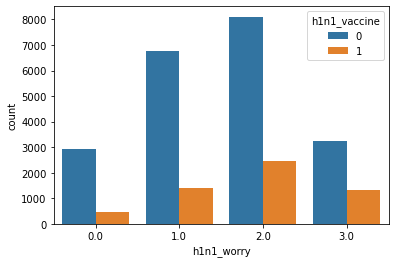

In [29]:
sns.countplot(x = 'h1n1_worry', hue = 'h1n1_vaccine', data = df)

In [32]:
from pandas_profiling import ProfileReport
ProfileReport(df, title="Pandas Profiling Report")

In [11]:
#Selecting the columns which have object datatypes
col = df.select_dtypes(include = ['object']).columns
col

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [12]:
#Converting into numeric values
for i in col:
    df[i] = LabelEncoder().fit_transform(df[i].astype(str))

In [13]:
del df['unique_id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [14]:
#Let's check the Correlation of our dataset
df.corr()

h1n1_worry  h1n1_awareness  antiviral_medication  \
h1n1_worry                   1.000000        0.070812              0.089210   
h1n1_awareness               0.070812        1.000000             -0.009899   
antiviral_medication         0.089210       -0.009899              1.000000   
contact_avoidance            0.235290        0.092918              0.050099   
bought_face_mask             0.153132        0.029156              0.145772   
wash_hands_frequently        0.293217        0.092972              0.064248   
avoid_large_gatherings       0.253331       -0.045952              0.106314   
reduced_outside_home_cont    0.243795       -0.065273              0.127204   
avoid_touch_face             0.249087        0.090599              0.071284   
dr_recc_h1n1_vacc            0.137611        0.094601              0.050882   
dr_recc_seasonal_vacc        0.121282        0.074284              0.031682   
chronic_medic_condition      0.090880       -0.011329              0.004637   
cont_child_undr_6_mnths      0.049170        0.026034              0.026183   
is_health_worker             0.033881        0.171131              0.007145   
has_health_insur            -0.099963        0.013644             -0.007147   
is_h1n1_vacc_effective       0.222801        0.134903              0.019210   
is_h1n1_risky                0.362047        0.085184              0.095664   
sick_from_h1n1_vacc          0.345678       -0.004136              0.070851   
is_seas_vacc_effective       0.212147        0.111406              0.002874   
is_seas_risky                0.317386        0.094386              0.073957   
sick_from_seas_vacc          0.215668       -0.040411              0.074298   
age_bracket                  0.054535       -0.048501             -0.094191   
qualification               -0.037694        0.197113             -0.042254   
race                        -0.127944        0.149489             -0.110963   
sex                         -0.126123       -0.068567             -0.006196   
income_level                 0.041263        0.033362              0.044485   
marital_status              -0.023386       -0.059801             -0.006093   
housing_status              -0.000341       -0.037493              0.030274   
employment                   0.046478       -0.075199             -0.008598   
census_msa                   0.003465       -0.060208              0.012176   
no_of_adults                -0.012968        0.029250              0.042272   
no_of_children               0.052442        0.055226              0.083090   
h1n1_vaccine                 0.121664        0.117153              0.040226   

                           contact_avoidance  bought_face_mask  \
h1n1_worry                          0.235290          0.153132   
h1n1_awareness                      0.092918          0.029156   
antiviral_medication                0.050099          0.145772   
contact_avoidance                   1.000000          0.065684   
bought_face_mask                    0.065684          1.000000   
wash_hands_frequently               0.334402          0.083282   
avoid_large_gatherings              0.226986          0.180377   
reduced_outside_home_cont           0.220113          0.162964   
avoid_touch_face                    0.335162          0.104725   
dr_recc_h1n1_vacc                   0.066704          0.079887   
dr_recc_seasonal_vacc               0.073419          0.065301   
chronic_medic_condition             0.040149          0.062200   
cont_child_undr_6_mnths             0.002066          0.036828   
is_health_worker                    0.004244          0.065645   
has_health_insur                    0.004284         -0.018718   
is_h1n1_vacc_effective              0.113240          0.023983   
is_h1n1_risky                       0.118234          0.120132   
sick_from_h1n1_vacc                 0.131410          0.097595   
is_seas_vacc_effective              0.118067          0.024840   
is_seas_risky       

In [15]:
x = df.iloc[:,:32]
x.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children'],
      dtype='object')

In [16]:
y = df.iloc[:,32:]
y.columns

Index(['h1n1_vaccine'], dtype='object')

In [17]:
regr = LogisticRegression()   

In [18]:
#Spliting into train and test
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 700)

In [19]:
#Let's check the shape of our model
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20030, 32)
(6677, 32)
(20030, 1)
(6677, 1)


In [20]:
regr.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [21]:
#Finding the prediction of our model
pred_y_test = regr.predict(x_test)

pred_y_train = regr.predict(x_train)

In [22]:
pred_y_test

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

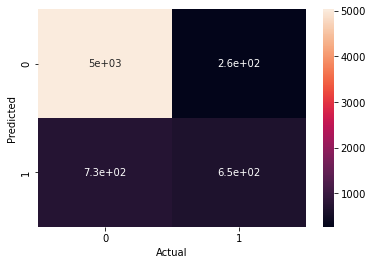

In [23]:
#Making the graph of actual test and predicted test
sns.heatmap(metrics.confusion_matrix(y_test,pred_y_test),annot = True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [24]:
print("Accuracy Score of Test dataset : %.4f"%(metrics.accuracy_score(y_test,pred_y_test)*100),end="%\n")
print("Area under curve of Test dataset : %.4f"%(metrics.roc_auc_score(y_test,pred_y_test)*100),end=" %")

Accuracy Score of Test dataset : 85.0382%
Area under curve of Test dataset : 71.0353 %

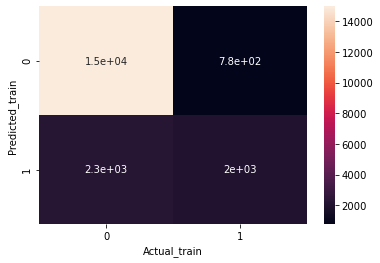

In [25]:
#Making the actual train and predicted train graph
sns.heatmap(metrics.confusion_matrix(y_train,pred_y_train),annot = True)
plt.xlabel('Actual_train')
plt.ylabel('Predicted_train')
plt.show()

In [28]:
print("Accuracy Score ",(metrics.accuracy_score(y_train,pred_y_train)*100))
print("Area under curve",(metrics.roc_auc_score(y_train,pred_y_train)*100))

Accuracy Score  84.82775836245632
Area under curve 71.17561263412885
